<a href="https://colab.research.google.com/github/ruandonino/predictStocksPrice/blob/main/PredictStocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a project that use historical data from finance to try predict stocks price

We choose to use the yfinance lib, this lib provides the data from the Yahoo Finance
url: https://finance.yahoo.com/

In [ ]:
!pip install yfinance --upgrade --no-cache-dir


This is a list with the 29 most negociated stocks in Brazil

In [ ]:
list_100_stacks = ['PETR4','VALE3', 'BBAS3','SBSP3','HAPV3','ITUB4','B3SA3','ASAI3','BBDC4','GGBR4',\
                 'CYRE3','EQTL3','RAIL3','MGLU3','LREN3','JBSS3','TIMS3','HYPE3','KLBN11','PRIO3',\
                 'EMBR3','RENT3','ALSO3','ABEV3','CSAN3','BBSE3','WEGE3','ITSA4','ELET3']
print(len(list_100_stacks))
print(list_100_stacks)

29
['PETR4', 'VALE3', 'BBAS3', 'SBSP3', 'HAPV3', 'ITUB4', 'B3SA3', 'ASAI3', 'BBDC4', 'GGBR4', 'CYRE3', 'EQTL3', 'RAIL3', 'MGLU3', 'LREN3', 'JBSS3', 'TIMS3', 'HYPE3', 'KLBN11', 'PRIO3', 'EMBR3', 'RENT3', 'ALSO3', 'ABEV3', 'CSAN3', 'BBSE3', 'WEGE3', 'ITSA4', 'ELET3']


Here we are accessing the data of this stocks and saving this data in a folder

In [ ]:
import yfinance as yf
import os

for code in list_100_stacks:
  stock = yf.Ticker(code + '.SA')
  # get historical market data
  hist = stock.history(period="10y")
  dir_path_model = "/content/data_history_stock/"+code
  os.makedirs(dir_path_model, exist_ok=True)
  hist.to_csv('data_history_stock/'+code+'/'+ code +'.csv')

Now we will get the historical data about this indexs real/dolar, euro/dolar, ibovespa, s&p500, nasd, petróleo, vix

In [ ]:
codes = ["BRL=X","EUR=X","^BVSP","^GSPC", "^NDX", "CL=F", "^VIX"]
for code in codes:
  stock = yf.Ticker(code)
  # get historical market data
  hist = stock.history(period="10y")
  dir_path_model = "/content/data_history_stock/"+code
  os.makedirs(dir_path_model, exist_ok=True)
  hist.to_csv('data_history_stock/'+code+'/'+ code +'.csv')

Here we are analyzing the data for a stock, to understand the AMBEV


In [ ]:
import pandas as pd
df_abev = pd.read_csv('data_history_stock/ABEV3/ABEV3.csv')
df_abev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486 entries, 0 to 2485
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2486 non-null   object 
 1   Open          2486 non-null   float64
 2   High          2486 non-null   float64
 3   Low           2486 non-null   float64
 4   Close         2486 non-null   float64
 5   Volume        2486 non-null   int64  
 6   Dividends     2486 non-null   float64
 7   Stock Splits  2486 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 155.5+ KB


In [ ]:
df_abev.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2486.000000,2486.000000,2486.000000,2486.000000,2.486000e+03,2486.000000,2486.000000
mean,14.337736,14.507220,14.168328,14.337646,1.882641e+07,0.002567,0.002011
std,1.937539,1.936677,1.940190,1.940171,1.471866e+07,0.033770,0.100281
min,9.512045,9.937561,9.184042,9.777992,0.000000e+00,0.000000,0.000000
25%,13.151174,13.378113,12.990213,13.187819,1.064005e+07,0.000000,0.000000
50%,14.510949,14.684659,14.352143,14.513866,1.567185e+07,0.000000,0.000000
75%,15.452860,15.608330,15.267044,15.444704,2.342870e+07,0.000000,0.000000
max,20.467177,20.609834,20.165079,20.366480,2.876952e+08,0.960000,5.000000


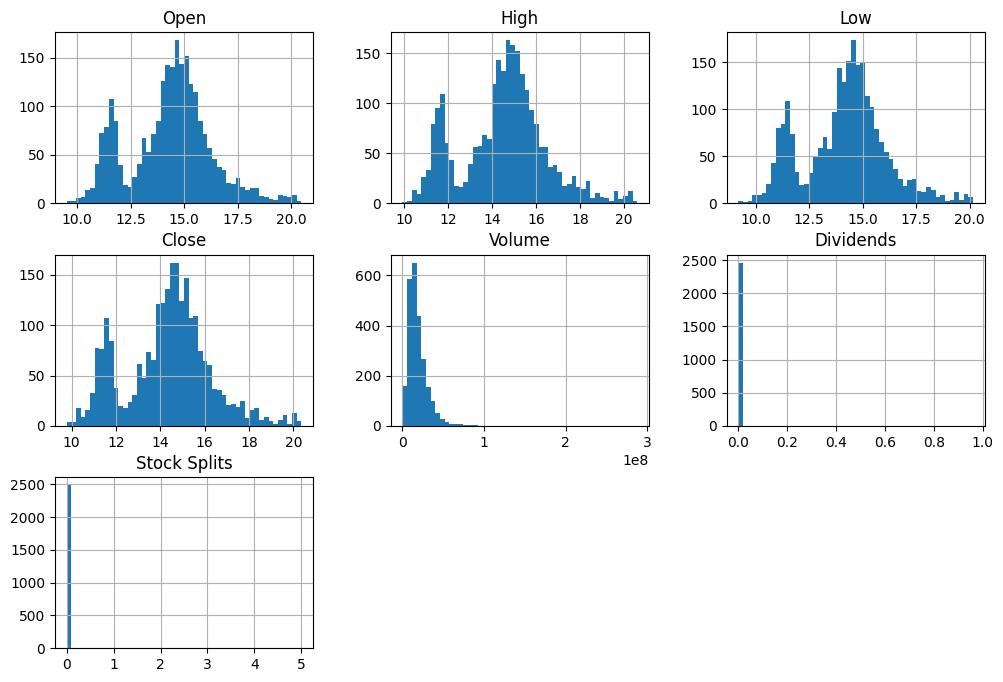

In [ ]:
import matplotlib.pyplot as plt
df_abev.hist(bins=50, figsize=(12, 8))
plt.show()

Here we acess the data about selic, the tax in Brazil from the last 5 years. This is a important information to try predict the price of stocks

In [ ]:
import requests

df_selic = pd.read_json('https://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados?formato=json&dataInicial=19/05/2013&dataFinal=01/08/2023')
df_selic

,data,valor
0,19/05/2013,7.50
1,20/05/2013,7.50
2,21/05/2013,7.50
3,22/05/2013,7.50
4,23/05/2013,7.50
...,...,...
3722,28/07/2023,13.75
3723,29/07/2023,13.75
3724,30/07/2023,13.75
3725,31/07/2023,13.75


In [ ]:
df_selic['Date'] = pd.to_datetime(df_selic['data'], utc=True)
df_selic['Date'] = df_selic['Date'].dt.date
df_selic.drop('data', axis=1, inplace=True)
df_selic

<ipython-input-14-f1e5cfc59828>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_selic['Date'] = pd.to_datetime(df_selic['data'], utc=True)


,valor,Date
0,7.50,2013-05-19
1,7.50,2013-05-20
2,7.50,2013-05-21
3,7.50,2013-05-22
4,7.50,2013-05-23
...,...,...
3722,13.75,2023-07-28
3723,13.75,2023-07-29
3724,13.75,2023-07-30
3725,13.75,2023-07-31


We need create a dataframe joining the data from the indexs for later create the models joining with the data from each stock

In [ ]:
list_csv = list_100_stacks + codes
df_bvsp = pd.read_csv('data_history_stock/^BVSP/^BVSP.csv')
df_gspc = pd.read_csv('data_history_stock/^GSPC/^GSPC.csv')
df_ndx = pd.read_csv('data_history_stock/^NDX/^NDX.csv')
df_vix = pd.read_csv('data_history_stock/^VIX/^VIX.csv')
df_cl = pd.read_csv('data_history_stock/CL=F/CL=F.csv')
df_brl = pd.read_csv('data_history_stock/BRL=X/BRL=X.csv')

df_indexs = df_bvsp[['Date','Open']]
df_indexs['Date'] = pd.to_datetime(df_indexs['Date'], format='%Y-%m-%d', utc=True)
df_indexs['Date'] = df_indexs['Date'].dt.date

df_indexs = pd.merge(df_indexs, df_selic, how='left', on='Date')
df_indexs.rename(columns={'Open': 'bvsp'}, inplace=True)
df_indexs.rename(columns={'valor': 'selic'}, inplace=True)

for info in [(df_gspc,'gspc'), (df_ndx,'ndx'), (df_vix,'vix'), (df_cl,'cl'), (df_brl,'brl')]:
  info[0]['Date'] = pd.to_datetime(info[0]['Date'], format='%Y-%m-%d', utc=True)
  info[0]['Date'] = info[0]['Date'].dt.date
  df_indexs = pd.merge(df_indexs, info[0][['Date','Open']], how='left', on='Date')
  df_indexs.rename(columns={'Open': info[1]}, inplace=True)

df_indexs

<ipython-input-15-1274f1185d58>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indexs['Date'] = pd.to_datetime(df_indexs['Date'], format='%Y-%m-%d', utc=True)
<ipython-input-15-1274f1185d58>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indexs['Date'] = df_indexs['Date'].dt.date


,Date,bvsp,selic,gspc,ndx,vix,cl,brl
0,2013-08-02,49141.000000,NaN,1706.099976,3125.489990,12.66,107.800003,NaN
1,2013-08-05,48477.000000,NaN,1708.010010,3136.770020,12.29,106.839996,2.3028
2,2013-08-06,48436.000000,8.00,1705.790039,3136.149902,12.19,106.480003,2.2953
3,2013-08-07,47422.000000,8.00,1695.300049,3117.129883,13.17,105.680000,2.3042
4,2013-08-08,47453.000000,8.50,1693.349976,3134.060059,12.50,104.180000,2.2789
...,...,...,...,...,...,...,...,...
2473,2023-07-27,122560.000000,13.75,4598.259766,15734.030273,13.14,78.900002,4.7416
2474,2023-07-28,120002.000000,13.75,4565.750000,15630.169922,14.03,79.839996,NaN
2475,2023-07-31,120188.000000,13.75,4584.819824,15774.299805,13.98,80.650002,4.7247
2476,2023-08-01,121945.000000,13.75,4578.830078,15696.980469,13.75,81.730003,4.7941


In [ ]:
df_indexs.describe()

,bvsp,selic,gspc,ndx,vix,cl,brl
count,2478.000000,2438.000000,2416.000000,2416.000000,2416.000000,2414.000000,2183.000000
mean,81770.678884,9.294811,2893.845938,7994.341926,18.225671,64.655514,3.957826
std,26110.852454,4.032505,884.000453,3886.808755,7.415386,21.420129,1.069468
min,37501.000000,2.000000,1630.250000,3060.959961,9.010000,12.960000,2.158800
25%,54629.250000,6.500000,2091.505005,4500.717407,13.227500,48.532499,3.172300
50%,81029.000000,10.250000,2726.750000,6950.170166,16.160000,59.820000,3.825100
75%,106100.750000,13.750000,3734.464905,11622.404785,21.600000,78.045000,5.115800
max,130776.000000,14.250000,4804.509766,16644.769531,82.690002,124.660004,5.886300


In [ ]:
df_indexs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2478 entries, 0 to 2477
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2478 non-null   object 
 1   bvsp    2478 non-null   float64
 2   selic   2438 non-null   float64
 3   gspc    2416 non-null   float64
 4   ndx     2416 non-null   float64
 5   vix     2416 non-null   float64
 6   cl      2414 non-null   float64
 7   brl     2183 non-null   float64
dtypes: float64(7), object(1)
memory usage: 174.2+ KB


In [ ]:
df_brl['Date'] = pd.to_datetime(df_brl['Date'], format='%Y-%m-%d', utc=True)
df_brl['Date'] = df_brl['Date'].dt.date
df_indexs = df_indexs.ffill()
df_indexs = df_indexs.drop(df_indexs.index[0])
df_indexs.head()

,Date,bvsp,selic,gspc,ndx,vix,cl,brl
1,2013-08-05,48477.0,NaN,1708.010010,3136.770020,12.29,106.839996,2.3028
2,2013-08-06,48436.0,8.0,1705.790039,3136.149902,12.19,106.480003,2.2953
3,2013-08-07,47422.0,8.0,1695.300049,3117.129883,13.17,105.680000,2.3042
4,2013-08-08,47453.0,8.5,1693.349976,3134.060059,12.50,104.180000,2.2789
5,2013-08-09,48949.0,9.0,1696.099976,3124.739990,12.88,103.870003,2.2789


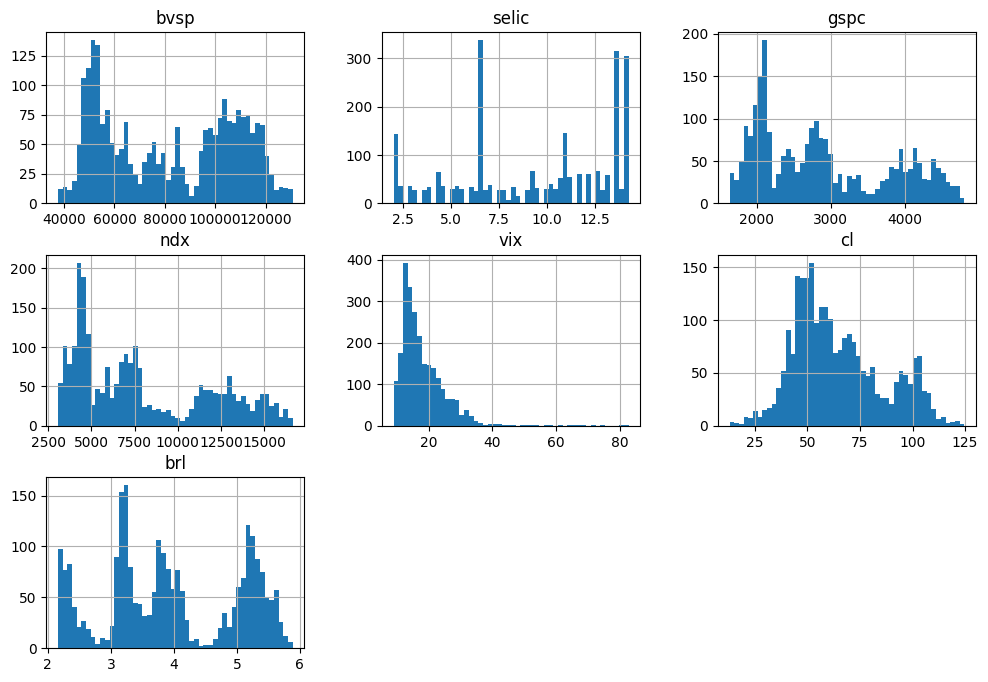

In [ ]:
df_indexs.hist(bins=50, figsize=(12, 8))
plt.show()

Now we are processing and joining data from stocks and indexs and save it in a folder to be accessed later to train and test the models

In [ ]:
from datetime import datetime, timedelta
import os
from sklearn.model_selection import train_test_split

for info in list_100_stacks:
  df_stock = pd.read_csv('data_history_stock/'+ info +'/'+ info +'.csv')
  df_stock['Date'] = pd.to_datetime(df_stock['Date'], format='%Y-%m-%d', utc=True)
  df_stock['Date'] = df_stock['Date'].dt.date
  df_stock = pd.merge(df_stock[['Date','Open']], df_indexs, how='left', on='Date')
  df_stock = df_stock.ffill()
  df_stock = df_stock.drop(df_stock.index[0])
  df_stock.rename(columns={'Open': 'stock'}, inplace=True)

  df_stock['Dat_type'] = pd.to_datetime(df_stock['Date'], format='%Y-%m-%d', utc=True)
  date_to_find30 = df_stock['Dat_type'] + timedelta(days = 30)
  date_to_find30 = pd.DataFrame({'Date':date_to_find30})
  date_to_find30['Date'] = date_to_find30['Date'].dt.date
  date_to_find30['Date'] = date_to_find30['Date'].astype(str)
  df_stock['Date30d'] = date_to_find30['Date']
  df_stock['Date'] = df_stock['Date'].astype(str)
  date_to_find30 = pd.merge(date_to_find30, df_stock[['Date', 'stock']], how='left', on='Date')

  date_to_find180 = df_stock['Dat_type'] + timedelta(days = 180)
  date_to_find180 = pd.DataFrame({'Date':date_to_find180})
  date_to_find180['Date'] = date_to_find180['Date'].dt.date
  date_to_find180['Date'] = date_to_find180['Date'].astype(str)
  df_stock['Date180d'] = date_to_find180['Date']

  date_to_find180 = pd.merge(date_to_find180, df_stock[['Date', 'stock']], how='left', on='Date')
  date_to_find30 = date_to_find30.ffill()
  date_to_find180 = date_to_find180.ffill()

  df_stock = pd.merge(df_stock, date_to_find30, how='left', left_on='Date30d', right_on='Date')
  df_stock = pd.merge(df_stock, date_to_find180, how='left', left_on='Date180d', right_on='Date')
  df_stock = df_stock.drop(['Date30d','Date180d','Date_y','Date'], axis=1)
  df_stock.rename(columns={'stock': 'stock180d'}, inplace=True)
  df_stock.rename(columns={'stock_y': 'stock30d'}, inplace=True)
  df_stock.rename(columns={'stock_x': 'stock'}, inplace=True)
  df_stock.rename(columns={'Date_x': 'Date'}, inplace=True)
  df_stock = df_stock.dropna()

  dir_path_train = "/content/data_history_stock/"+info
  dir_path_test = "/content/data_history_stock/"+info
  os.makedirs(dir_path_train, exist_ok=True)
  os.makedirs(dir_path_test, exist_ok=True)
  df_stock.to_csv('/content/data_history_stock/'+ info +'/'+ info +'.csv')
  train_set, test_set = train_test_split(df_stock, test_size=0.2, random_state=42)
  train_set.to_csv('/content/data_history_stock/'+ info +'/'+ info +'_train.csv')
  test_set.to_csv('/content/data_history_stock/'+ info +'/'+ info +'_test.csv')

To ensure that we have a well distribution by years in the test set

In [ ]:
from sklearn.model_selection import train_test_split

df_stock = pd.read_csv('data_history_stock/BBSE3/BBSE3_train.csv')
df_stock['Dat_type'] = pd.to_datetime(df_stock['Dat_type'], format='%Y-%m-%d', utc=True)
df_stock['Year'] = df_stock['Dat_type'].dt.year

stock_test_set = pd.read_csv('data_history_stock/BBSE3/BBSE3_test.csv')
stock_test_set['Dat_type'] = pd.to_datetime(stock_test_set['Dat_type'], format='%Y-%m-%d', utc=True)
stock_test_set['Year'] = stock_test_set['Dat_type'].dt.year

stock_test_set['Year'].value_counts() / len(stock_test_set)

2022    0.123116
2019    0.113065
2020    0.103015
2017    0.103015
2015    0.097990
2014    0.095477
2016    0.092965
2018    0.090452
2021    0.087940
2023    0.055276
2013    0.037688
Name: Year, dtype: float64

Here we will see what is the graph of each index and the price of stock after 30 days and also after 180 days

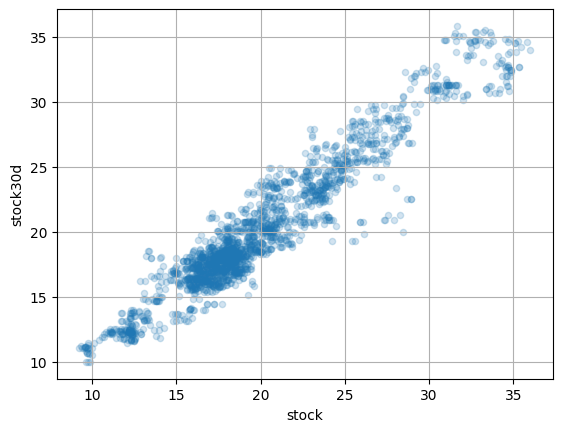

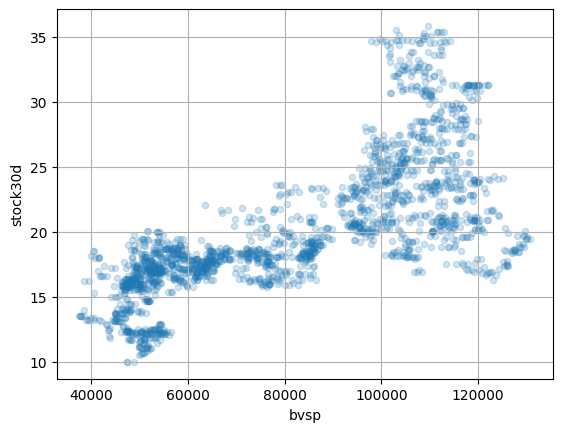

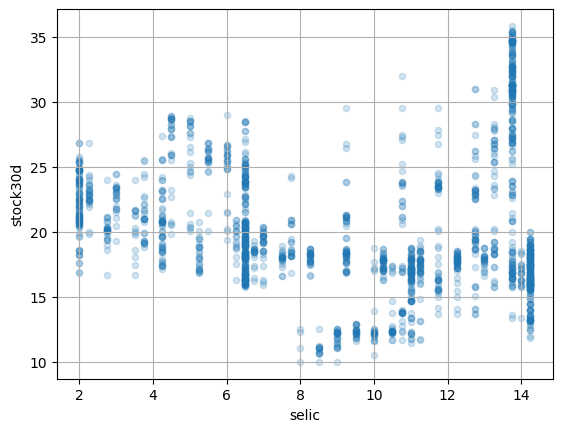

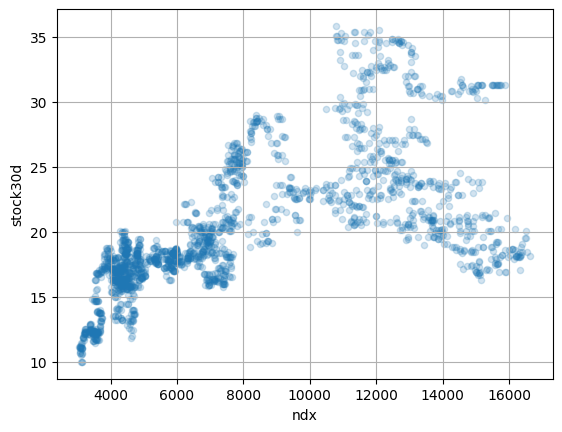

In [ ]:
list_indexs = ["stock","bvsp","selic","ndx"]
for code in list_indexs:
  df_stock.plot(kind="scatter", x=code, y="stock30d", grid=True, alpha=0.2)
  plt.show()

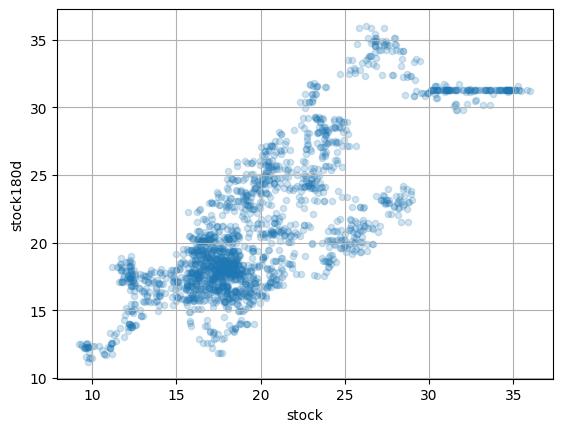

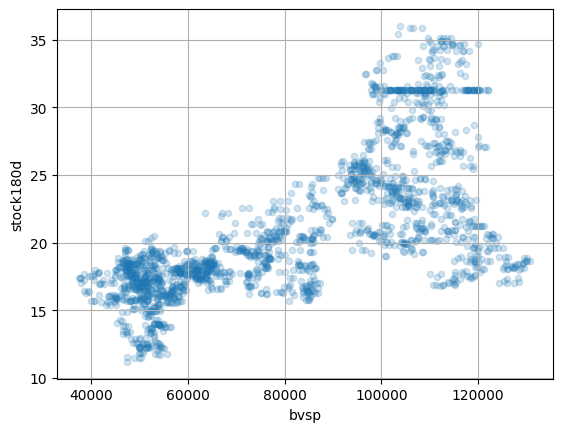

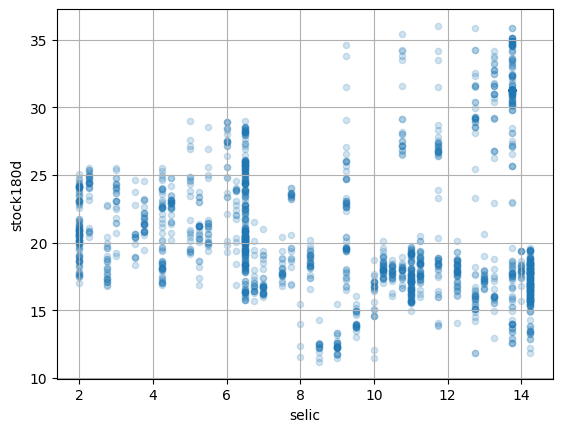

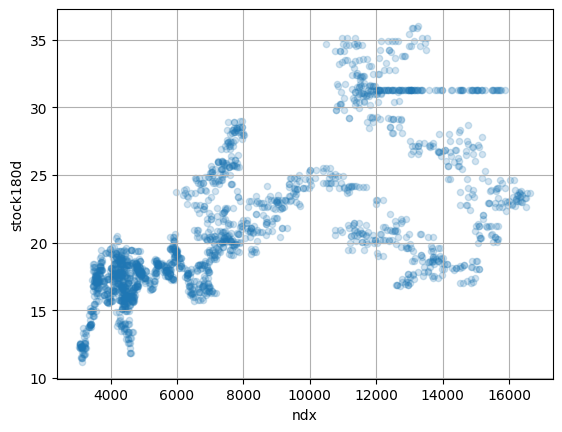

In [ ]:
for code in list_indexs:
  df_stock.plot(kind="scatter", x=code, y="stock180d", grid=True, alpha=0.2)
  plt.show()

This graph shows the relationship between the actual price and the price of the stock WEGE after 180 days. This color show how is the ibovespa in this date

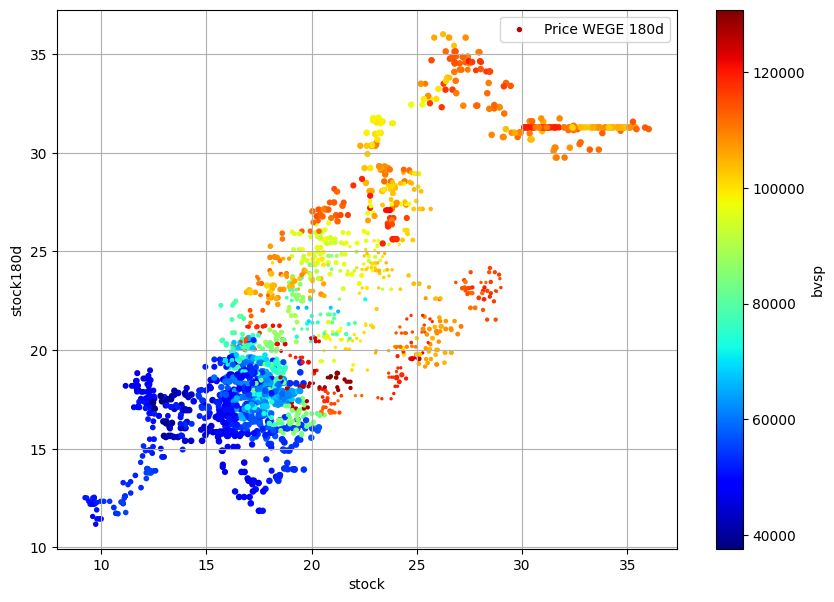

In [ ]:
df_stock.plot(kind="scatter", x="stock", y="stock180d", grid=True,
s=df_stock["selic"], label="Price WEGE 180d",
c="bvsp", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
plt.show()

To understand the importance of each feature we need measure the correlation between them.

In [ ]:
stock_corre = df_stock.corr()
stock_corre["stock30d"].sort_values(ascending=False)

<ipython-input-30-31fffebc23fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stock_corre = df_stock.corr()


stock30d      1.000000
stock         0.955671
stock180d     0.833507
Unnamed: 0    0.806729
Year          0.805138
bvsp          0.727071
gspc          0.681791
brl           0.648409
ndx           0.641929
vix           0.293805
cl            0.032139
selic        -0.039938
Name: stock30d, dtype: float64

In [ ]:
stock_corre["stock180d"].sort_values(ascending=False)

stock180d     1.000000
stock30d      0.833507
Unnamed: 0    0.811589
Year          0.808144
stock         0.800743
gspc          0.710081
bvsp          0.695508
ndx           0.668695
brl           0.647350
vix           0.363564
cl            0.220887
selic         0.032522
Name: stock180d, dtype: float64

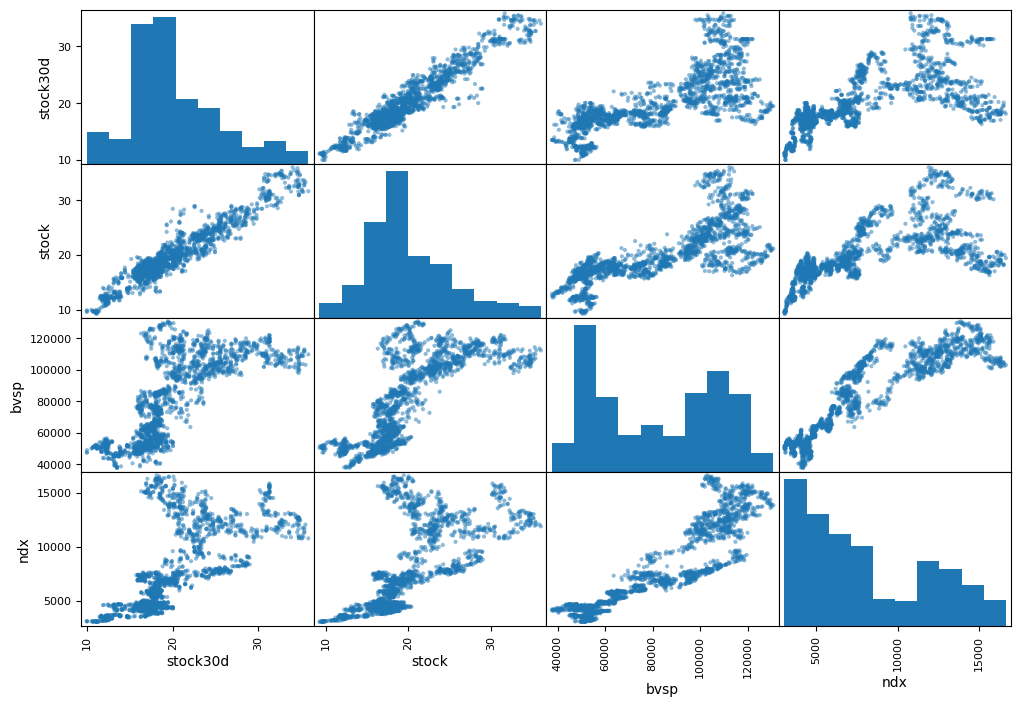

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["stock30d", "stock", "bvsp", "ndx"]
scatter_matrix(df_stock[attributes], figsize=(12, 8))
plt.show()

In [ ]:
data_stock = df_stock.drop(["stock30d", "stock180d"], axis=1)
data_stock_30d = df_stock["stock30d"].copy()
data_stock_180d = df_stock["stock180d"].copy()

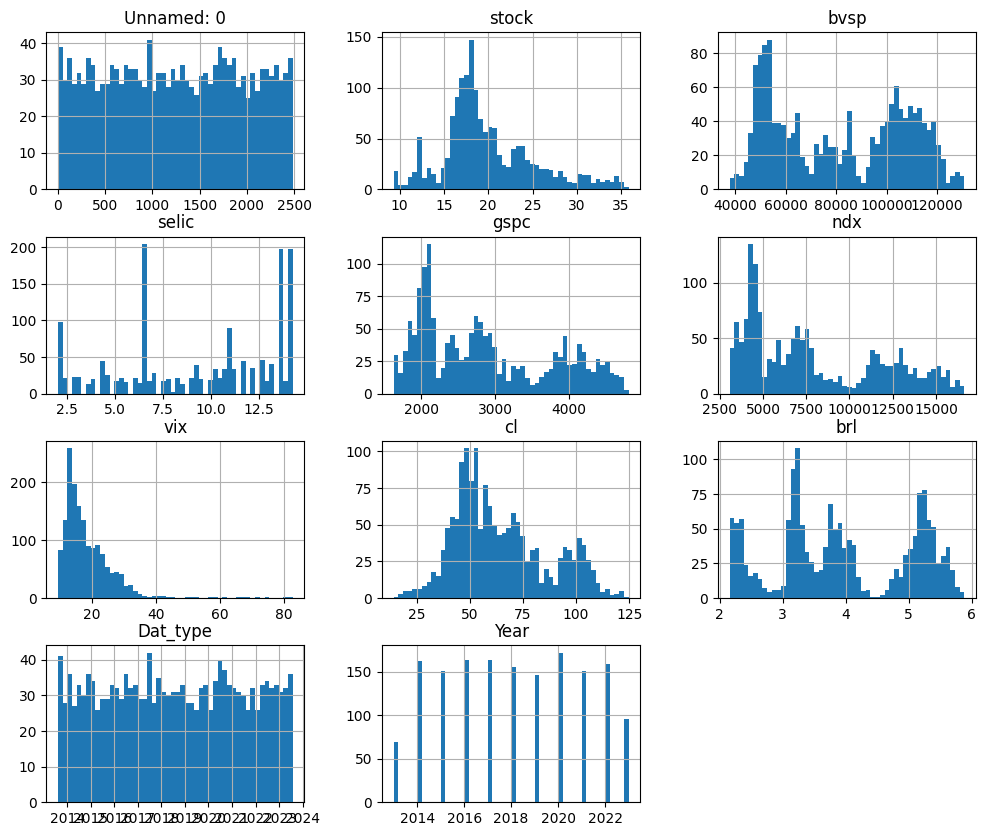

In [ ]:
data_stock.hist(bins=50, figsize=(12, 10))
plt.show()

In [ ]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1588 entries, 1786 to 1126
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  1588 non-null   int64              
 1   Date        1588 non-null   object             
 2   stock       1588 non-null   float64            
 3   bvsp        1588 non-null   float64            
 4   selic       1588 non-null   float64            
 5   gspc        1588 non-null   float64            
 6   ndx         1588 non-null   float64            
 7   vix         1588 non-null   float64            
 8   cl          1588 non-null   float64            
 9   brl         1588 non-null   float64            
 10  Dat_type    1588 non-null   datetime64[ns, UTC]
 11  Year        1588 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(8), int64(2), object(1)
memory usage: 161.3+ KB


In [ ]:
data_stock_num = data_stock.drop(["Unnamed: 0", "Date", "Dat_type", "Year"], axis=1)

We need standarlize the features with a scaler and we should analyse how the data will appear

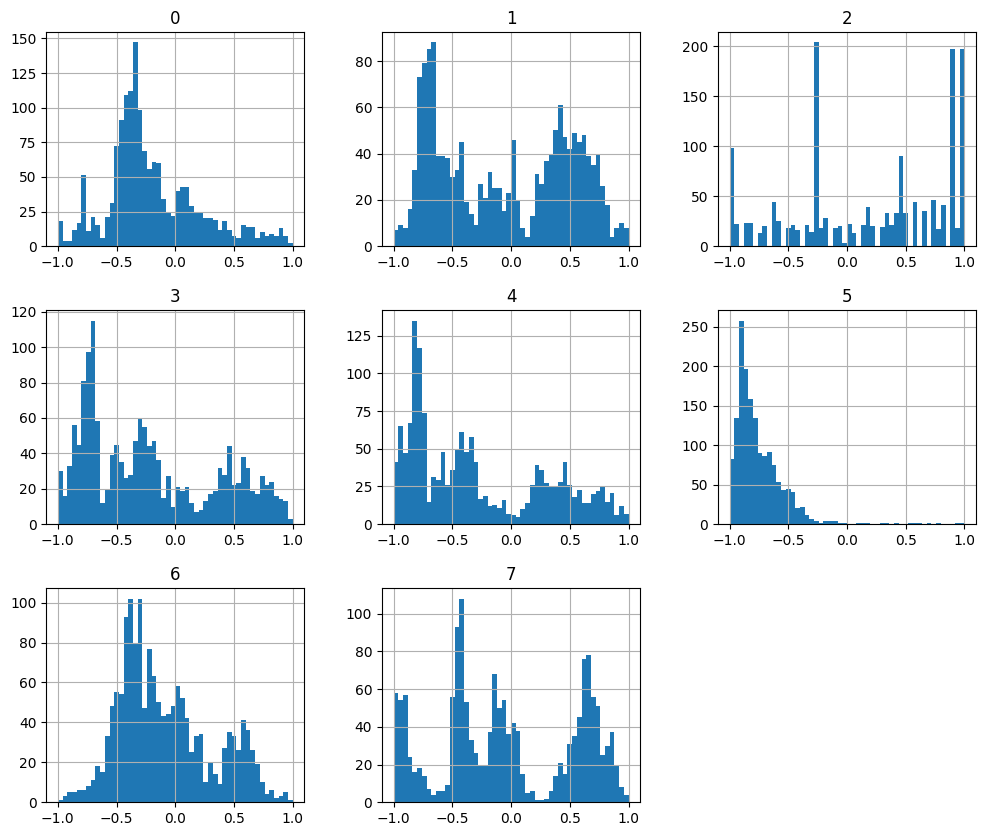

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
wege_min_max_scaled = min_max_scaler.fit_transform(data_stock_num)
df_hist = pd.DataFrame(wege_min_max_scaled)

df_hist.hist(bins=50, figsize=(12, 10))
plt.show()
del df_hist

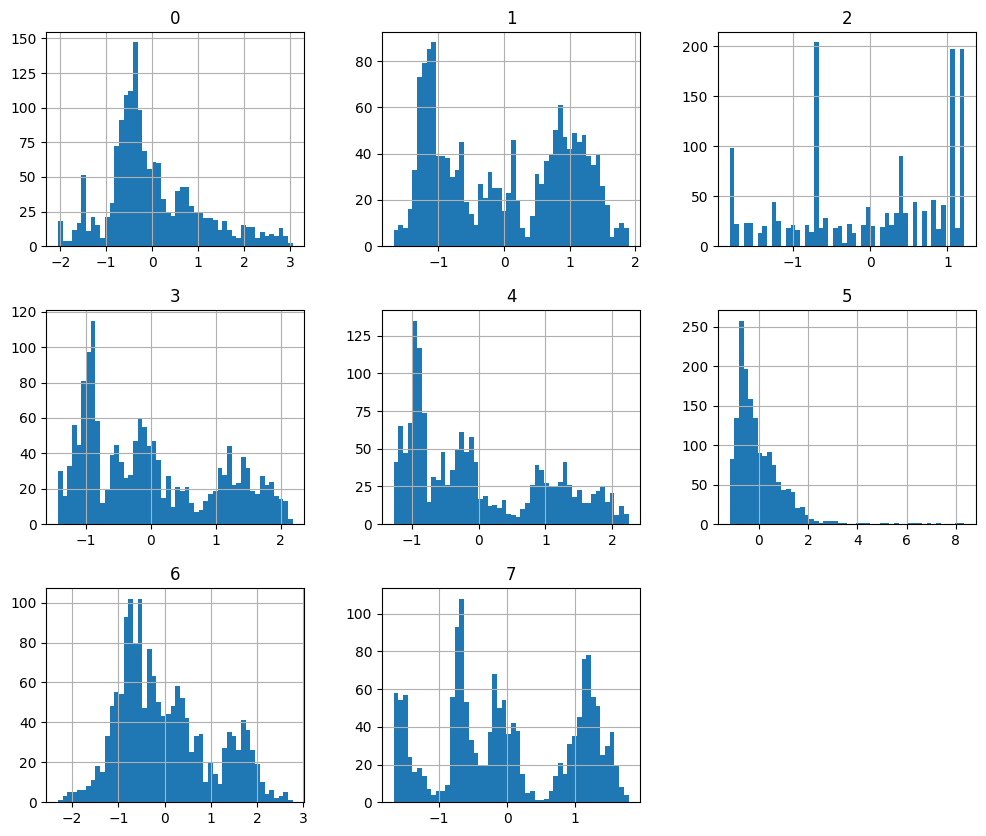

In [ ]:
from sklearn.preprocessing import StandardScaler

wege_min_max_scaler = StandardScaler()
wege_num_std_scaled = wege_min_max_scaler.fit_transform(data_stock_num)

df_hist = pd.DataFrame(wege_num_std_scaled)
df_hist.hist(bins=50, figsize=(12, 10))
plt.show()
del df_hist

Now we will create a pipeline the process the data to send to the models

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
import numpy as np

num_pipeline = Pipeline([("standardize", StandardScaler())])
preprocessing_data_stock = make_column_transformer(
(num_pipeline, make_column_selector(dtype_include=np.number))
)
wege_data_prepared = preprocessing_data_stock.fit_transform(data_stock_num)
preprocessing_data_stock.get_feature_names_out()


array(['pipeline__stock', 'pipeline__bvsp', 'pipeline__selic',
       'pipeline__gspc', 'pipeline__ndx', 'pipeline__vix', 'pipeline__cl',
       'pipeline__brl'], dtype=object)

We will create and train the models to compare the models using the training data to understand what is the best model for our data.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

lin_reg = make_pipeline(preprocessing_data_stock, LinearRegression())
lin_reg.fit(data_stock_num, data_stock_30d)

wege_predictions = lin_reg.predict(data_stock_num)
print(wege_predictions[:5].round(2))
print(data_stock_30d.iloc[:5].values)

[22.72 17.65 28.71 22.79 17.79]
[22.41065899 18.36888384 31.29000092 23.81881599 18.55925477]


In [ ]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(data_stock_30d, wege_predictions, squared=False)
print(lin_rmse)

1.3972807292548928


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing_data_stock, DecisionTreeRegressor(random_state=42))
tree_reg.fit(data_stock_num, data_stock_30d)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7dfa6225a530>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
wege_predictions = tree_reg.predict(data_stock_num)
tree_rmse = mean_squared_error(data_stock_30d, wege_predictions, squared=False)
print(tree_rmse)

6.420776150086131e-09


In [ ]:
df_stock_num_train = df_stock.drop(["Unnamed: 0", "Date", "Dat_type", "Year","stock30d", "stock180d"], axis=1)
data_stock_30d_train = df_stock["stock30d"].copy()
data_stock_180d_train = df_stock["stock180d"].copy()
df_stock_num_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stock   1986 non-null   float64
 1   bvsp    1986 non-null   float64
 2   selic   1986 non-null   float64
 3   gspc    1986 non-null   float64
 4   ndx     1986 non-null   float64
 5   vix     1986 non-null   float64
 6   cl      1986 non-null   float64
 7   brl     1986 non-null   float64
dtypes: float64(8)
memory usage: 124.2 KB


In [ ]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, df_stock_num_train, data_stock_30d_train, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

count    10.000000
mean      0.909796
std       0.052769
min       0.816507
25%       0.877623
50%       0.911091
75%       0.939134
max       0.998219
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing_data_stock, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, df_stock_num_train, data_stock_30d_train, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

count    10.000000
mean      0.664532
std       0.048044
min       0.588303
25%       0.637544
50%       0.671930
75%       0.702079
max       0.723207
dtype: float64

In [ ]:
from sklearn.svm import LinearSVR

svc_reg = make_pipeline(preprocessing_data_stock, LinearSVR(C=1, random_state=42))
svr_rmses = -cross_val_score(svc_reg, df_stock_num_train, data_stock_30d_train, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(svr_rmses).describe()

count    10.000000
mean      1.447577
std       0.081494
min       1.314223
25%       1.400745
50%       1.481085
75%       1.505061
max       1.547986
dtype: float64

In [ ]:
from sklearn.svm import SVR

svr_poli = make_pipeline(preprocessing_data_stock, SVR(kernel="poly", degree=3, C=1, epsilon=0.1))
svc_poli_rmses = -cross_val_score(svr_poli, df_stock_num_train, data_stock_30d_train, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(svc_poli_rmses).describe()

count    10.000000
mean      1.693933
std       0.158236
min       1.384775
25%       1.606729
50%       1.730159
75%       1.792949
max       1.895413
dtype: float64

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_pipe = make_pipeline(preprocessing_data_stock, ada_clf)
ada_rmses = -cross_val_score(ada_pipe, df_stock_num_train, data_stock_30d_train, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(ada_rmses).describe()

count    10.000000
mean      1.251869
std       0.059598
min       1.168508
25%       1.219409
50%       1.252805
75%       1.280945
max       1.349746
dtype: float64

In [ ]:
! pip install scikeras

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from scikeras.wrappers import KerasRegressor


def create_model():

  # Define model
  model_nn = keras.Sequential([
      layers.Dense(64, activation='relu', input_shape=df_stock_num_total.shape[1:]),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  # Compile model
  model_nn.compile(
      optimizer='adam',
      loss='mean_squared_error',  # typical loss function for regression problems
      metrics=['mean_absolute_error']  # MAE is a good metric for regression problems
  )

  return model_nn

model_nn = KerasRegressor(build_fn=create_model, epochs=20, verbose=0)

nn_pipe = make_pipeline(preprocessing_data_stock, model_nn)
nn_rmses = -cross_val_score(nn_pipe, df_stock_num_train, data_stock_30d_train, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(nn_rmses).describe()

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

count    10.000000
mean      1.134436
std       0.079812
min       0.985736
25%       1.094057
50%       1.141387
75%       1.201415
max       1.224688
dtype: float64

As we can see the model the have the smaller error is the RandomForest. So now we will to search for the best parameters in this model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest_reg = make_pipeline(preprocessing_data_stock, RandomForestRegressor(random_state=42))

grid_space={'randomforestregressor__max_depth':[3,5,10,None],
              'randomforestregressor__n_estimators':[10,100,200],
              'randomforestregressor__max_features':[1,3,5,7],
              'randomforestregressor__min_samples_leaf':[1,2,3],
              'randomforestregressor__min_samples_split':[1,2,3]
           }

random_forest_grid_search = GridSearchCV(forest_reg, param_grid=grid_space, scoring="neg_root_mean_squared_error", cv=10)
random_forest_grid_search.fit(df_stock_num_total, data_stock_30d_full)
print(random_forest_grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 3, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 200}


In [ ]:
cv_res = pd.DataFrame(random_forest_grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_depth,param_randomforestregressor__max_features,param_randomforestregressor__min_samples_leaf,param_randomforestregressor__min_samples_split,param_randomforestregressor__n_estimators,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
356,1.191758,0.137709,0.023892,0.003191,None,3,1,2,200,"{'randomforestregressor__max_depth': None, 'ra...",...,-0.626465,-0.584903,-0.678188,-0.543311,-0.503447,-0.651563,-0.684876,-0.619962,0.056884,1
355,0.559487,0.010687,0.013814,0.001871,None,3,1,2,100,"{'randomforestregressor__max_depth': None, 'ra...",...,-0.630694,-0.588346,-0.670497,-0.544128,-0.510735,-0.653692,-0.697162,-0.623179,0.056643,2
359,1.148901,0.124525,0.022029,0.003363,None,3,1,3,200,"{'randomforestregressor__max_depth': None, 'ra...",...,-0.646422,-0.601588,-0.686467,-0.540664,-0.515481,-0.660111,-0.689254,-0.627581,0.056062,3
358,0.608134,0.102987,0.014057,0.002706,None,3,1,3,100,"{'randomforestregressor__max_depth': None, 'ra...",...,-0.657710,-0.598540,-0.693363,-0.534237,-0.513431,-0.666119,-0.695545,-0.630516,0.060520,4
383,1.687985,0.168703,0.075147,0.153261,None,5,1,2,200,"{'randomforestregressor__max_depth': None, 'ra...",...,-0.636265,-0.611730,-0.679233,-0.568309,-0.540380,-0.654786,-0.712535,-0.631895,0.049252,5


One of the main advantage of models of forest is that you can see the importance of each feature in the predicted value. But this value is just for the model of wege3 data.

In [ ]:
final_model = random_forest_grid_search.best_estimator_
feature_importances = final_model["randomforestregressor"].feature_importances_
feature_importances.round(2)
#print(final_model)
sorted(zip(feature_importances,
       final_model["columntransformer"].get_feature_names_out()), reverse=True)


[(0.4105243476859827, 'pipeline__stock'),
 (0.15526032128104614, 'pipeline__bvsp'),
 (0.14359611381395707, 'pipeline__ndx'),
 (0.10109964931816955, 'pipeline__gspc'),
 (0.06830425129334523, 'pipeline__selic'),
 (0.06295745441721792, 'pipeline__brl'),
 (0.038799904003704935, 'pipeline__cl'),
 (0.019457958186576477, 'pipeline__vix')]

In [ ]:
len(stock_test_set)

398

Finally, after that we choosed and trained the model. We should measure the error of model with the test set.

In [ ]:
X_test = stock_test_set.drop("stock30d", axis=1)
y_test = stock_test_set["stock30d"].copy()
final_predictions = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

0.23193081003077679


In the end, we will train the randomforest model for each stock, measure the error and save the models in a folder to after make a deploy.

In [ ]:
from joblib import dump, load
import os



for info in list_100_stacks[0:25]:
  df_stock_train = pd.read_csv('data_history_stock/'+ info +'/'+info+'_train.csv')
  df_stock_test = pd.read_csv('data_history_stock/'+ info +'/'+info+'_test.csv')
  data_stock_train_30d = df_stock_train["stock30d"].copy()
  data_stock_train_180d = df_stock_train["stock180d"].copy()
  df_stock_train = df_stock_train.drop(["Unnamed: 0", "Date", "Dat_type","stock30d", "stock180d"], axis=1)

  data_stock_test_30d = df_stock_test["stock30d"].copy()
  data_stock_test_180d = df_stock_test["stock180d"].copy()

  preprocessing_data_stock = make_column_transformer(
          (num_pipeline, make_column_selector(dtype_include=np.number))
  )
  stock_data_prepared = preprocessing_data_stock.fit_transform(df_stock_train)

  forest_reg_30d = make_pipeline(preprocessing_data_stock, RandomForestRegressor(n_estimators=200, random_state=42))
  forest_reg_30d.fit(df_stock_train, data_stock_train_30d)
  stock_predictions_30d = forest_reg_30d.predict(df_stock_test)
  forest_rmse_30d = mean_squared_error(data_stock_test_30d, stock_predictions_30d, squared=False)

  forest_reg_180d = make_pipeline(preprocessing_data_stock, RandomForestRegressor(n_estimators=200, random_state=42))
  forest_reg_180d.fit(df_stock_train, data_stock_train_180d)
  stock_predictions_180d = forest_reg_180d.predict(df_stock_test)
  forest_rmse_180d = mean_squared_error(data_stock_test_180d, stock_predictions_180d, squared=False)

  dir_path_model = "/content/model_stock/"+info
  os.makedirs(dir_path_model, exist_ok=True)
  dump(forest_reg_30d, 'model_stock/'+ info +'/model_'+info+'_30d'+'.joblib')
  dump(forest_reg_180d, 'model_stock/'+ info +'/model_'+info+'_180d'+'.joblib')


  print(info+' rmse 30d - '+str(forest_rmse_30d))
  print(info+' rmse 180d - '+str(forest_rmse_180d))

PETR4 rmse 30d - 0.4934834441582493
PETR4 rmse 180d - 0.6579985855266338
VALE3 rmse 30d - 1.8473855636160281
VALE3 rmse 180d - 1.716152502183443
BBAS3 rmse 30d - 1.029773590173586
BBAS3 rmse 180d - 1.38618606498431
SBSP3 rmse 30d - 1.0714295065630484
SBSP3 rmse 180d - 1.484947528687678
HAPV3 rmse 30d - 0.48957462377887645
HAPV3 rmse 180d - 0.5025509264375589
ITUB4 rmse 30d - 0.8432082005376139
ITUB4 rmse 180d - 0.9039370228468292
B3SA3 rmse 30d - 0.36506573745488097
B3SA3 rmse 180d - 0.42375443425019704
ASAI3 rmse 30d - 0.7050382733066166
ASAI3 rmse 180d - 0.5827699601126816
BBDC4 rmse 30d - 0.5043092864337271
BBDC4 rmse 180d - 0.7068208000164918
GGBR4 rmse 30d - 0.624164676434638
GGBR4 rmse 180d - 0.7544092144355367
CYRE3 rmse 30d - 0.6265146841377659
CYRE3 rmse 180d - 0.92119560847581
EQTL3 rmse 30d - 0.49991606000594946
EQTL3 rmse 180d - 0.6536886765928882
RAIL3 rmse 30d - 0.5380097058378784
RAIL3 rmse 180d - 0.5562034374015569
MGLU3 rmse 30d - 0.412529997076359
MGLU3 rmse 180d - 0.

Now we have a reasonable models to predict the price of stocks based on past data. Thanks for read this notebook